# Shifted Beam (HG00 and HG10 in-phase addition)

For a small shift of the input axis, $a << w_{0}$, in the +x-direction relative to the cavity axis, the shifted $u_{00}$ mode can be solved in terms of an added $u_{10}$ mode up to a constant factor:
	
\begin{align}\label{eq:9}
    u_{00}(x-a,y,0) 
        =&\Big(\frac{2}{\pi}\Big)^{-1/2}
        \Big(\frac{1}{w_{0}}\Big)
        \exp\Big(-\frac{(x-a)^{2}+y^{2}}{w_{0}^{2}}\Big)
    \nonumber\\	
        = & \Big(\frac{2}{\pi}\Big)^{-1/2} 
        \Big(\frac{1}{w_{0}}\Big)
        \exp\Big(-\frac{y^{2}}{w_{0}^{2}}\Big)
        \exp\Big(-\frac{(x-a)^{2}}{w_{0}^{2}}\Big)
    \nonumber\\	
        = & u_{00}(x,y,0) \times exp \Big( \frac{2ax + a^{2}}{w_{0}^2} 			\Big)
    \nonumber\\
        =	& u_{00}(x,y,0)
        \left[ 1+ \frac{2ax}{w_{0}^{2}}+			\mathcal{O} \frac{a}{w}^{2} \right]
    \nonumber\\ 
        \nonumber\approx	& u_{00} + \frac{2ax}{w_{0}^{2}} u_{00}
        \\
= &u_{00}(x,y,0)+\frac{a}{w_{0}}u_{10}(x,y,0) \;.
\end{align}

The predicted shift is then

\begin{equation}
    a \approx \frac{\Re(C_{10})}{\Im(C_{00})}w_{0}
\end{equation}	

In [1]:
import PauLisa as pl, numpy as np

In [2]:
a=pl.defaultParams
b=pl.Plane(-1e-3,1e-3,40001,-1e-3,1e-3,3)
c=pl.Plane(-1e-3,1e-3,10001,-1e-3,1e-3,3)


In [3]:
# spot centers for initial beam and translated beam
# Re[a10]/a00 = delta s/wo , w0 = 1e-3

a10 = .04
a00 = 1

m0 = pl.modes((0,0,a00))
m1 = pl.modes((1,0,a10))
m01 = pl.modes((0,0,a00),(1,0,a10))

f0 =pl.calculate_q(a,b,m0,0)
f1 =pl.calculate_q(a,b,m1,0)
f01 = pl.calculate_q(a,b,m01,0)
f = pl.calculate_q(a,b,m01,0)

#print ("predicted x shift: "+str(pl.np.real(a10)/1*a.w0) + " m")
#print ("actual: " + str(pl.PeakInt(f01).x[0]-pl.PeakInt(f0).x[0]) + " m")
#print ("% err: " + str(((pl.np.real(a10)/1*a.w0)-(pl.PeakInt(f01).x[0]-pl.PeakInt(f0).x[0]))*100/(pl.np.real(a10)/1*a.w0)))
#print("Combined intensity 0,0 & 1,0 mode, x=y=z=0: " + str(abs(pl.amplitude(a,0,0,0,m01))**2))
#print("Predicted combined intensity, x=y=z=0: " + str(abs(np.sqrt(2/pl.pi)/a.w0)**2))

# Re[a10]/a00 = delta s/wo , w0 = 1e-3

a10 = .08

m01a = pl.modes((0,0,a00),(1,0,a10))

f01a = pl.calculate(a,b,m01a,0)

#print ("predicted x shift: "+str(pl.np.real(a10)/a00*a.w0))
#print ("actual: " + str(pl.PeakInt(f01).x[0]-pl.PeakInt(f0).x[0]))
#print ("% err: " + str(((pl.np.real(a10)/1*a.w0)-(pl.PeakInt(f01).x[0]-pl.PeakInt(f0).x[0]))*100/(pl.np.real(a10)/1*a.w0)))

a10 = .16
m01b = pl.modes((0,0,a00),(1,0,a10))
f01b = pl.calculate(a,b,m01b,0)

#print ("predicted x shift: "+str(pl.np.real(a10)/a00*a.w0))
#print ("actual: " + str(pl.PeakInt(f01).x[0]-pl.PeakInt(f0).x[0]))
#print ("% err: " + str(((pl.np.real(a10)/1*a.w0)-(pl.PeakInt(f01).x[0]-pl.PeakInt(f0).x[0]))*100/(pl.np.real(a10)/1*a.w0)))


# Results

"(1,0) Scale",0.04,0.08,0.16
Pred. Shift[x10^5 m],4,8,16
Act. Shift [x10^5 m],3.9849,7.8998,15.2546
% Error,0.37,1.25,4.65


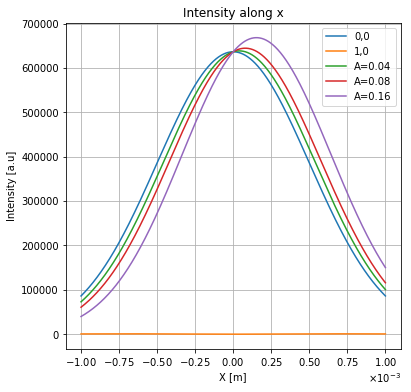

In [6]:
from IPython.display import HTML, display
import tabulate
table = [["(1,0) Scale",0.04,0.08,0.16],
         ["Pred. Shift[x10^5 m]",4.0,8.0,16.0],
         ["Act. Shift [x10^5 m]",3.9849,7.8998,15.2546],
         ["% Error",0.37,1.25,4.65]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

pl.intslicex_q(0,f0,f1,f01,f01a,f01b,labels=['0,0','1,0','A=0.04','A=0.08','A=0.16'])